# EMOVO

## Data Exploration

In [1]:
import os
import librosa

In [13]:
from IPython.display import Audio
sample_file = '../data/EMOVO/f1/dis-f1-b1.wav'

Audio(sample_file)

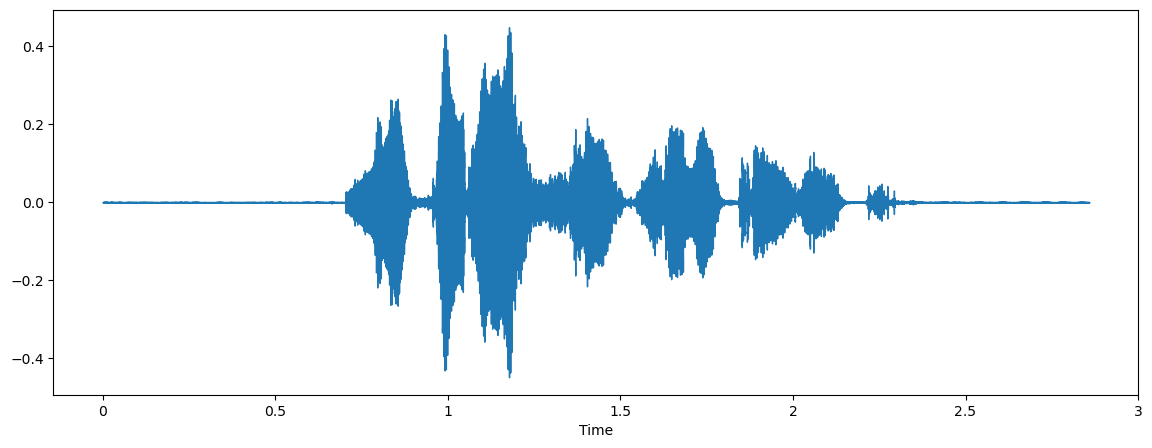

In [23]:
import librosa.display
import matplotlib.pyplot as plt
sample, sample_rate = librosa.load(sample_file, sr=None)

plt.figure(figsize=(14, 5))
librosa.display.waveshow(sample, sr=sample_rate)
plt.show()

In [24]:
categories = ['dis', 'gio', 'neu', 'pau', 'rab', 'sor', 'tri']

In [25]:
cate_dic = {}
for i, cate in enumerate(categories):
    cate_dic[cate] = i

In [26]:
cate_dic

{'dis': 0, 'gio': 1, 'neu': 2, 'pau': 3, 'rab': 4, 'sor': 5, 'tri': 6}

In [27]:
from tqdm import tqdm
import pandas as pd

data_path = '../data/EMOVO/'
sr = 16000
file_names = []
labels = []
audios = []
for folder in tqdm(['f1', 'f2', 'f3', 'm1', 'm2', 'm3']):
    folder_path = data_path + folder + '/'
    files = []
    classes = []
    for file in os.listdir(folder_path):
        if file == 'metadata.csv':
            continue
        file_names.append(file)
        vector, _ = librosa.load(folder_path+file, sr=sr)
        audios.append(librosa.util.fix_length(vector, 100000))
        labels.append(cate_dic[file.split('-')[0]])
        files.append(file)
        classes.append(cate_dic[file.split('-')[0]])
    data = pd.DataFrame({'file_name':files, 'label':classes})
    data.to_csv(data_path+folder+'/metadata.csv', index=False)

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:47<00:00,  7.92s/it]


In [28]:
data = pd.DataFrame({'file':file_names, 'audio':audios, 'label':labels})


In [29]:
data['length'] = data['audio'].apply(lambda x: len(x))

In [30]:
data.head()

,file,audio,label,length
0,rab-f1-d1.wav,"[0.0003846623, 0.0006918541, 0.00060322735, 0....",4,100000
1,dis-f1-n3.wav,"[-0.00032913836, -0.00049420673, -0.0004405303...",0,100000
2,rab-f1-b3.wav,"[-0.00020087056, -0.0001549173, -0.00023994075...",4,100000
3,sor-f1-d1.wav,"[-3.1229785e-05, 4.838789e-05, 9.443722e-05, 5...",5,100000
4,pau-f1-d1.wav,"[5.745172e-05, 4.685712e-05, -2.2102773e-05, -...",3,100000


In [31]:
data.boxplot(column='length')

<AxesSubplot:>

## Traditional Model

In [32]:
data.audio.explode()

0      0.000385
0      0.000692
0      0.000603
0      0.000642
0      0.000529
         ...   
587         0.0
587         0.0
587         0.0
587         0.0
587         0.0
Name: audio, Length: 58800000, dtype: object

## Wav2Vec

In [11]:
from datasets import Dataset, load_dataset

/opt/conda/lib/python3.7/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [12]:
f1 = load_dataset("audiofolder", data_dir='../data/EMOVO/f1')
f2 = load_dataset("audiofolder", data_dir='../data/EMOVO/f2')
f3 = load_dataset("audiofolder", data_dir='../data/EMOVO/f3')
m1 = load_dataset("audiofolder", data_dir='../data/EMOVO/m1')
m2 = load_dataset("audiofolder", data_dir='../data/EMOVO/m2')
m3 = load_dataset("audiofolder", data_dir='../data/EMOVO/m3')


Resolving data files: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 99/99 [00:00<00:00, 17168.45it/s]
Using custom data configuration default-61ca376ebf2d0d45

















































































































Extracting data files: 0it [00:00, ?it/s]


Dataset audiofolder downloaded and prepared to /home/jz3313/.cache/huggingface/datasets/audiofolder/default-61ca376ebf2d0d45/0.0.0/6cbdd16f8688354c63b4e2a36e1585d05de285023ee6443ffd71c4182055c0fc. Subsequent calls will reuse this data.


Resolving data files: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 99/99 [00:00<00:00, 175872.98it/s]
Using custom data configuration default-7320af0c670f9800



















































































































Extracting data files: 0it [00:00, ?it/s]


Dataset audiofolder downloaded and prepared to /home/jz3313/.cache/huggingface/datasets/audiofolder/default-7320af0c670f9800/0.0.0/6cbdd16f8688354c63b4e2a36e1585d05de285023ee6443ffd71c4182055c0fc. Subsequent calls will reuse this data.


Resolving data files: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 99/99 [00:00<00:00, 25837.60it/s]
Using custom data configuration default-125a11ee197754cc


















































































































Extracting data files: 0it [00:00, ?it/s]


Dataset audiofolder downloaded and prepared to /home/jz3313/.cache/huggingface/datasets/audiofolder/default-125a11ee197754cc/0.0.0/6cbdd16f8688354c63b4e2a36e1585d05de285023ee6443ffd71c4182055c0fc. Subsequent calls will reuse this data.


Resolving data files: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 99/99 [00:00<00:00, 57767.96it/s]
Using custom data configuration default-41df311e7cacdaf2
















































































































Extracting data files: 0it [00:00, ?it/s]


Dataset audiofolder downloaded and prepared to /home/jz3313/.cache/huggingface/datasets/audiofolder/default-41df311e7cacdaf2/0.0.0/6cbdd16f8688354c63b4e2a36e1585d05de285023ee6443ffd71c4182055c0fc. Subsequent calls will reuse this data.


Resolving data files: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 99/99 [00:00<00:00, 34063.67it/s]
Using custom data configuration default-67de29394111def7

















































































































Extracting data files: 0it [00:00, ?it/s]


Dataset audiofolder downloaded and prepared to /home/jz3313/.cache/huggingface/datasets/audiofolder/default-67de29394111def7/0.0.0/6cbdd16f8688354c63b4e2a36e1585d05de285023ee6443ffd71c4182055c0fc. Subsequent calls will reuse this data.


Resolving data files: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 99/99 [00:00<00:00, 32417.53it/s]
Using custom data configuration default-67dbccf640098588

















































































































Extracting data files: 0it [00:00, ?it/s]


Dataset audiofolder downloaded and prepared to /home/jz3313/.cache/huggingface/datasets/audiofolder/default-67dbccf640098588/0.0.0/6cbdd16f8688354c63b4e2a36e1585d05de285023ee6443ffd71c4182055c0fc. Subsequent calls will reuse this data.


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 343.74it/s]


In [13]:
import datasets
dataset = datasets.concatenate_datasets([f1['train'], f2['train'], f3['train'], m1['train'], m2['train'], m3['train']])



In [14]:
dataset = dataset.train_test_split(test_size=0.2)
dataset

DatasetDict({
    train: Dataset({
        features: ['audio', 'label'],
        num_rows: 470
    })
    test: Dataset({
        features: ['audio', 'label'],
        num_rows: 118
    })
})

In [15]:
dataset['train'][0]['audio']

{'path': '/home/jz3313/Multilingual-Speech-Emotion-Recognition-System/data/EMOVO/m3/rab-m3-b2.wav',
 'array': array([ 0.0000000e+00,  1.5258789e-05,  0.0000000e+00, ...,
         0.0000000e+00, -3.0517578e-05, -3.0517578e-05], dtype=float32),
 'sampling_rate': 48000}

In [16]:
labels = data['label'].unique()

In [17]:
label2id, id2label = dict(), dict()
for i, label in enumerate(list(categories)):
    label2id[label] = str(i)
    id2label[str(i)] = label

In [18]:
id2label

{'0': 'dis',
 '1': 'gio',
 '2': 'neu',
 '3': 'pau',
 '4': 'rab',
 '5': 'sor',
 '6': 'tri'}

In [19]:
from transformers import AutoFeatureExtractor

feature_extractor = AutoFeatureExtractor.from_pretrained("facebook/wav2vec2-large-xlsr-53-italian")


In [20]:
from datasets import Audio
dataset = dataset.cast_column("audio", Audio(sampling_rate=16_000))

In [21]:
def preprocess_function(examples):
    audio_arrays = [x['array'] for x in examples["audio"]]
    inputs = feature_extractor(
        audio_arrays, sampling_rate=feature_extractor.sampling_rate, max_length=100000, truncation=True
    )
    return inputs

In [22]:
dataset = dataset.map(preprocess_function, remove_columns="audio", batched=True)

Parameter 'function'=<function preprocess_function at 0x7f15f52d85f0> of the transform datasets.arrow_dataset.Dataset._map_single couldn't be hashed properly, a random hash was used instead. Make sure your transforms and parameters are serializable with pickle or dill for the dataset fingerprinting and caching to work. If you reuse this transform, the caching mechanism will consider it to be different from the previous calls and recompute everything. This warning is only showed once. Subsequent hashing failures won't be showed.
  0%|                                                                                                                                                         | 0/1 [00:00<?, ?ba/s]2022-10-20 21:03:18.647565: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, 

In [23]:
from transformers import AutoModelForAudioClassification, TrainingArguments, Trainer

num_labels = len(id2label)
model = AutoModelForAudioClassification.from_pretrained(
    "facebook/wav2vec2-large-xlsr-53-italian", num_labels=num_labels, label2id=label2id, id2label=id2label
)


Some weights of the model checkpoint at facebook/wav2vec2-large-xlsr-53-italian were not used when initializing Wav2Vec2ForSequenceClassification: ['lm_head.bias', 'lm_head.weight']
- This IS expected if you are initializing Wav2Vec2ForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing Wav2Vec2ForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of Wav2Vec2ForSequenceClassification were not initialized from the model checkpoint at facebook/wav2vec2-large-xlsr-53-italian and are newly initialized: ['projector.weight', 'projector.bias', 'classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able t

In [24]:
training_args = TrainingArguments(
    output_dir="./results/EMOVO",
    evaluation_strategy="epoch",
    save_strategy="epoch",
    learning_rate=3e-5,
    num_train_epochs=5,
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=dataset["train"],
    eval_dataset=dataset["test"],
    tokenizer=feature_extractor,
)


In [ ]:
trainer.train()

/opt/conda/lib/python3.7/site-packages/transformers/optimization.py:310: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  FutureWarning,
***** Running training *****
  Num examples = 470
  Num Epochs = 5
  Instantaneous batch size per device = 8
  Total train batch size (w. parallel, distributed & accumulation) = 8
  Gradient Accumulation steps = 1
  Total optimization steps = 295
